In [2]:
# data => Salary_Data.csv

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [64]:
# check if there r any outlier in salary

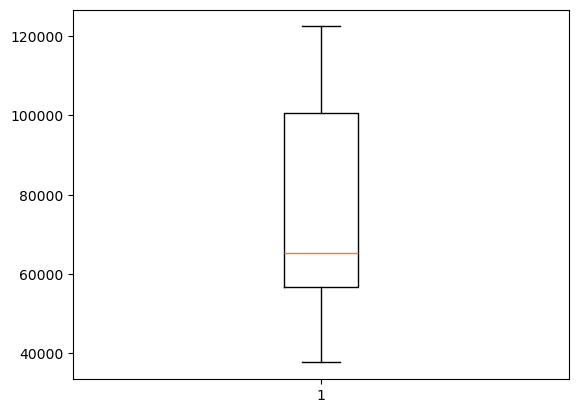

In [66]:
plt.boxplot(df['Salary']);

In [68]:
df['Salary'].max(), df['Salary'].min()

(122391.0, 37731.0)

In [70]:
import warnings
warnings.filterwarnings('ignore')

In [72]:
df['Salary'][12] = 300000

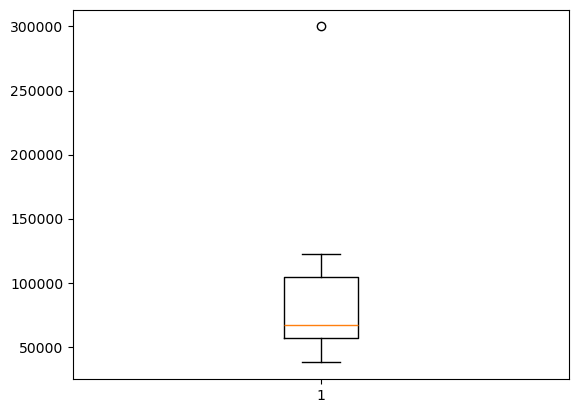

In [74]:
plt.boxplot(df['Salary']);

In [76]:
# removing outliers

In [78]:
q1 = np.percentile(df['Salary'], 25)
q3 = np.percentile(df['Salary'], 75)

In [80]:
iqr = q3 - q1

In [82]:
q1, q3, iqr

(56751.75, 104512.0, 47760.25)

In [84]:
ub = q3 + (1.5 * iqr)
lb = q1 - (1.5 * iqr)

In [86]:
# filter the data

In [92]:
df = df[(df['Salary'] > lb) & (df['Salary'] < ub)]

In [94]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


### Multivariate outlier removal

#### isolation forest

In [98]:
# data => wisc_bc_data.csv

In [100]:
df = pd.read_csv('wisc_bc_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [102]:
x = df.drop(['id', 'diagnosis'], axis = 1)
y = df['diagnosis']

In [104]:
# outlier removal

In [106]:
from sklearn.ensemble import IsolationForest

In [108]:
iso = IsolationForest(random_state= 0, contamination= 0.05)

In [110]:
clean = iso.fit_predict(x, y)

In [114]:
clean;

In [122]:
x_new = x[clean == 1]
y_new = y[clean == 1]

In [124]:
# cross validation 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new,
                                                   random_state=0)

In [126]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state= 0)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [128]:
from sklearn.metrics import accuracy_score
y_pred = rf.predict(x_test)
accuracy_score(y_test, y_pred)

0.9333333333333333